In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img1 = cv2.imread('dog_backpack.png')
img2 = cv2.imread('watermark_no_copy.png')

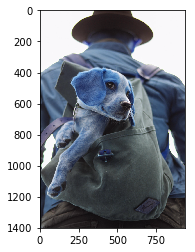

In [3]:
plt.imshow(img1)

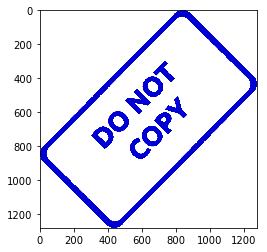

In [5]:
plt.imshow(img2)

# Converting BGR to RGB

In [6]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

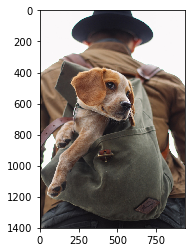

In [7]:
plt.imshow(img1)

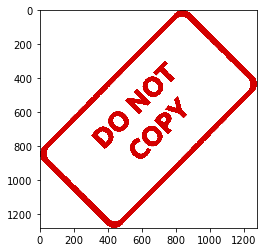

In [8]:
plt.imshow(img2)

# BLENDING IMAGES WITH SAME SIZE

## Resizing the image

In [9]:
resize_img1 = cv2.resize(img1,(600,600))
resize_img2 = cv2.resize(img2,(600,600))

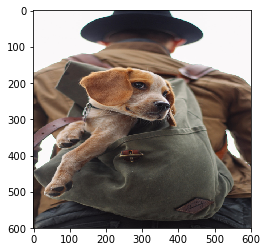

In [10]:
plt.imshow(resize_img1)

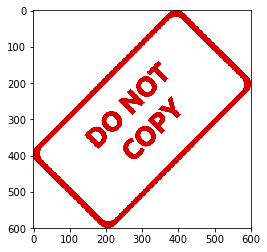

In [11]:
plt.imshow(resize_img2)

In [12]:
blended = cv2.addWeighted(src1=resize_img1, alpha=1, src2=resize_img2, beta = 0.2, gamma=1)

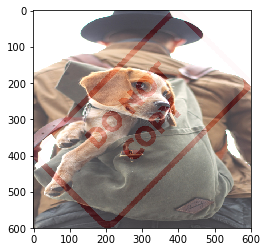

In [13]:
plt.imshow(blended)

# Overlay image on top of a layer image(no blending)

## Numpy reassignment

In [14]:
resized_Img = cv2.resize(img2, (600,600))

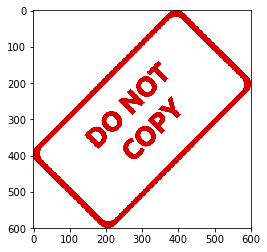

In [15]:
plt.imshow(resized_Img)

In [16]:
large_img = img1
small_img = resized_Img

In [17]:
x_offset = 0
y_offset = 0

In [18]:
small_img.shape

(600, 600, 3)

In [19]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [20]:
x_end, y_end

(600, 600)

In [28]:
large_img[y_offset:y_end, x_offset:x_end] = small_img

# Decide where to blend the imge

In [33]:
img1.shape

(1401, 934, 3)

In [34]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [36]:
img2.shape

(1280, 1277, 3)

In [39]:
rows, columns, channels = img2.shape

In [40]:
rows, columns, channels

(1280, 1277, 3)

In [41]:
roi = img1[y_offset:1401, x_offset:943]

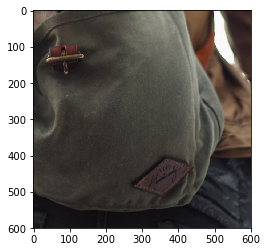

In [42]:
plt.imshow(roi)

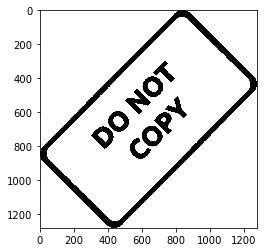

In [46]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2_gray, cmap='gray')

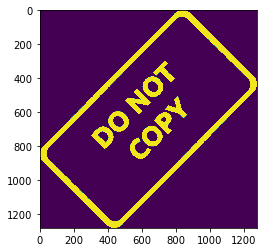

In [50]:
mask_inv = cv2.bitwise_not(img2_gray)
plt.imshow(mask_inv)

(1280, 1277)

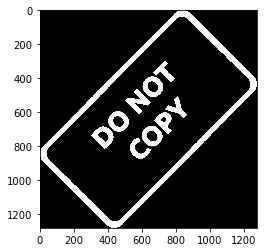

In [67]:
plt.imshow(mask_inv, cmap='gray')
mask_inv.shape

In [53]:
import numpy as np
white_background = np.full(img2.shape, 255, dtype = np.uint8)

In [55]:
white_background.shape

(1280, 1277, 3)

In [56]:
bk = cv2.bitwise_or(white_background, white_background, mask = mask_inv)

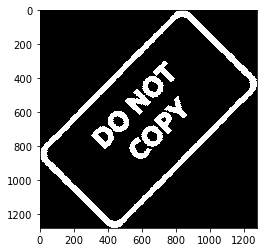

In [57]:
plt.imshow(bk)

In [59]:
foreground = cv2.bitwise_or(img2, img2, mask = mask_inv)

In [61]:
foreground.shape

(1280, 1277, 3)

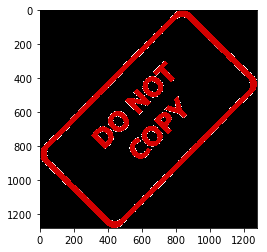

In [62]:
plt.imshow(foreground)

In [65]:
final_roi = cv2.bitwise_or(roi, foreground)

error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\core\src\arithm.cpp:225: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'cv::binary_op'


In [66]:
plt.imshow(final_roi)

NameError: name 'final_roi' is not defined